# Text Classification

- Classification models to predict the Positive/Negative labels based on text content alone.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os

%matplotlib inline

# Data Preparation

- The dataset contains of 2000 movie reviews. 1000 are positive, 1000 are negative, and the text has been preprocessed as a tab-delimited file
- Dataset v2.0 obtained from http://www.cs.cornell.edu/people/pabo/movie-review-data/

In [2]:
# Loading dataset
location = os.path.join(os.path.dirname(__name__), os.path.abspath('moviereviews.tsv'))
df = pd.read_csv(location, sep='\t')
print(r"The dataset contains",len(df),"movie reviews")
df.head()

The dataset contains 2000 movie reviews


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
# Check for missing values
df.isnull().sum()

label      0
review    35
dtype: int64

In [4]:
# Drop missing values in review column
df.dropna(inplace=True)
len(df)

1965

In [5]:
# Detect empty strings or "whitespace only" in review column
blanks = []

for index, label, review in df.itertuples():
    if type(review)==str:
        if review.isspace():
            blanks.append(index)

print(r"The reviews contain ",len(blanks), "empty strings.")
print('blanks index: ', blanks)

The reviews contain  27 empty strings.
blanks index:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [6]:
# Drop the reviews with empty strings
df.drop(blanks, inplace=True)
len(df)

1938

In [7]:
# Check the label column
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

# Data Modeling

In [8]:
# Spliting dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [9]:
# Importing pipeline and ML models
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics

In [10]:
# Create a list of classifiers for looping
classifiers = [MultinomialNB(), LinearSVC(), 
               NuSVC(probability=True, gamma="auto"), DecisionTreeClassifier(), 
               KNeighborsClassifier(), RandomForestClassifier(n_estimators=100), 
               AdaBoostClassifier(), GradientBoostingClassifier()]

In [11]:
# Training the dataset and calculate its accuracy with test sets
# A dataframe is created for visualization purpose
accuracies = {}
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)])
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    
    accuracies.update({name:accuracy})
    print(r"Accuracy: ", accuracy)
    
    log_entry = pd.DataFrame([[name, accuracy*100]], columns=log_cols)
    log = log.append(log_entry)

highest_accuracy = max(accuracies.values())
model = [key for (key, value) in accuracies.items() if value == highest_accuracy]
print("="*30)
print()
print(''.join(model), f"has the highest accuracy of {(max(accuracies.values())):.2%}")

MultinomialNB
Accuracy:  0.7963917525773195
LinearSVC
Accuracy:  0.865979381443299
NuSVC
Accuracy:  0.6649484536082474
DecisionTreeClassifier
Accuracy:  0.6134020618556701
KNeighborsClassifier
Accuracy:  0.5876288659793815
RandomForestClassifier
Accuracy:  0.7628865979381443
AdaBoostClassifier
Accuracy:  0.7680412371134021
GradientBoostingClassifier
Accuracy:  0.8092783505154639

LinearSVC has the highest accuracy of 86.60%


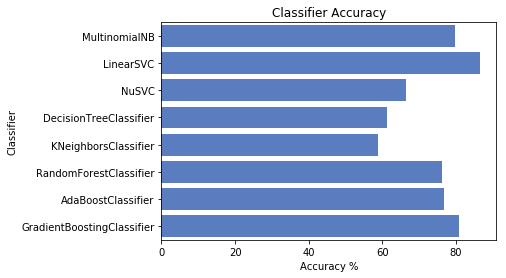

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Feed Own Data

In [13]:
# Create a pipeline for LinearSVC model and train it
svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [14]:
# Write your review and run!
review = "I love this movie, but the talking scene is too much"
print(svc.predict([review]))

['neg']
